In [6]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import trompy as tp

from scipy.ndimage import gaussian_filter1d

import dill

rcParams['font.family'] = 'Arial'
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['savefig.transparent'] = True
colors = ["#67AFD2", "#016895", "#F4795B", "#C74632"]

savefigs = False

DATAFOLDER = Path("..//data")
RESULTSFOLDER = Path("..//results")
FIGSFOLDER = Path("C:/Users/jmc010/Dropbox/Publications in Progress/Bazzino Roitman_sodium/figs")

In [7]:
with open(DATAFOLDER / "bazzino_data_with_clusters_and_dists.pickle", "rb") as f:
    data = dill.load(f)
x_array = data["x_array"]
snips_photo = data["snips_photo"]
snips_vel = data["snips_vel"]
pca = data["pca"]

In [8]:
# get reduced x_array and list of rats
x_array_red = x_array.query("infusiontype == '45NaCl' & condition == 'deplete'")
rats = x_array_red.id.unique()

In [9]:
# make smoothed clusterness column in case needed
for rat in rats:
    mask = x_array.id == rat
    clusterness = x_array.loc[mask, 'clusterness_photo'].values
    
    # Apply Gaussian smoothing
    smoothed = gaussian_filter1d(clusterness, sigma=2)  # Adjust sigma
    x_array.loc[mask, 'clusterness_photo_smoothed'] = smoothed

Cross-correlation values: [ 1.95441681e-02 -5.22326182e-02 -1.06195043e+00 -2.73769915e+00
 -3.92408819e+00 -2.78881201e+00  2.56615828e-01  2.02381134e+00
  4.30115951e+00  6.50343767e+00 -1.66923239e-01  1.50107991e+00
  2.39132906e+00  3.27957296e+00  4.30356026e+00  3.86423329e+00
  4.03510998e+00  1.10723369e+01 -8.35562366e+00 -7.19706499e+00
 -2.03911912e+00 -2.32980357e+01 -1.64110760e+01  1.50852392e+00
 -1.06491915e+01 -1.54854790e+01 -7.15049878e+00 -2.08142943e+01
 -1.25856184e+01 -1.22531453e+01 -1.84691285e+01 -2.31675104e+01
 -2.24178806e+01 -1.80357908e+01 -1.89263608e+01 -1.53995615e+01
 -1.82716415e+01 -3.59754485e+01 -2.71784187e+01 -2.51861900e+01
 -4.13787117e+01 -3.42709649e+01 -4.40199327e+01 -5.63593068e+01
 -4.09685752e+01 -4.84322120e+01 -5.75656126e+01 -7.14625221e+01
 -8.11993571e+01 -7.70584590e+01 -6.93741567e+01 -4.88402345e+01
 -4.01924270e+01 -1.84793922e+01 -2.47776449e+01 -1.04685569e+01
  2.43770548e+00 -1.94353764e+01 -9.10107342e+00 -1.16262909e+01

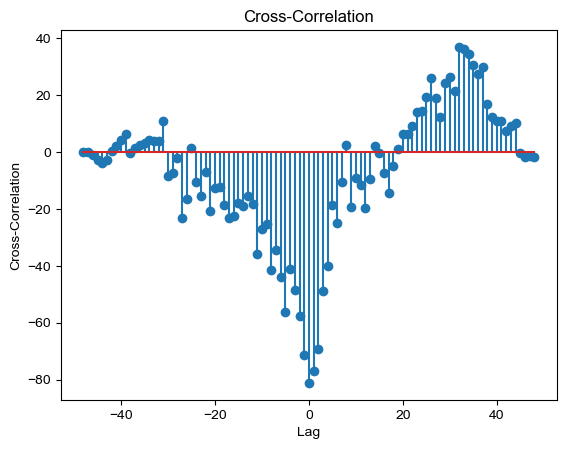

In [16]:

x_rat = x_array_red.query("id == @rat")

# x = x_rat.clusterness_photo.values
x = x_rat.euclidean_diff.values
y = x_rat.auc_vel.values

# Compute cross-correlation
cross_corr = np.correlate(x, y, mode='full')
# Lags
lags = np.arange(-len(x) + 1, len(x))
# Find the lag with the maximum correlation
max_corr_index = np.argmax(cross_corr)
best_lag = lags[max_corr_index]
print("Cross-correlation values:", cross_corr)
print("Best lag:", best_lag)
# Plot the cross-correlation
plt.stem(lags, cross_corr)
plt.title("Cross-Correlation")
plt.xlabel("Lag")
plt.ylabel("Cross-Correlation")
plt.show()

In [14]:
x_rat.columns

Index(['trial', 'id', 'condition', 'infusiontype', 'cluster_photo',
       'cluster_vel', 'auc_snips', 'auc_vel', 'clusterness_photo',
       'euclidean_diff'],
      dtype='object')

In [19]:
all_lags = []

for rat in rats:
    x_rat = x_array_red.query("id == @rat")

    x = x_rat.euclidean_diff.values
    # x = x_rat.clusterness_photo.values
    y = x_rat.auc_vel.values

    cross_corr = np.correlate(x, y, mode='full')
    # Lags
    lags = np.arange(-len(x) + 1, len(x))
    # Find the lag with the maximum correlation
    max_corr_index = np.argmax(cross_corr)
    min_corr_index = np.argmin(cross_corr)
    best_lag = lags[min_corr_index]

    all_lags.append(best_lag)

print("All best lags:", all_lags)

# lags are probably due to edge effects, let's think about cross-correlating smoothed data or a better measure than angular veloscity

All best lags: [np.int64(0), np.int64(3), np.int64(-10), np.int64(-3), np.int64(6), np.int64(0), np.int64(2), np.int64(0), np.int64(-5), np.int64(0)]


In [67]:
x_rat.columns

Index(['trial', 'id', 'condition', 'infusiontype', 'cluster_photo',
       'cluster_vel', 'auc_snips', 'auc_vel', 'clusterness_photo',
       'clusterness_photo_smoothed'],
      dtype='object')

In [ ]:
all